In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_disease_risk_distribution(csv_path):
    # Load CSV
    df = pd.read_csv(csv_path)

    # Check if required column exists
    if 'Disease_Risk' not in df.columns:
        raise ValueError("The CSV file must contain a 'Disease_Risk' column.")

    # Count values
    counts = df['Disease_Risk'].value_counts()
    print("Disease_Risk value counts:\n", counts)

    # Plot
    counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Count of Disease Risk Values')
    plt.xlabel('Disease Risk')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()




Disease_Risk value counts:
 Disease_Risk
1    1519
0     401
Name: count, dtype: int64


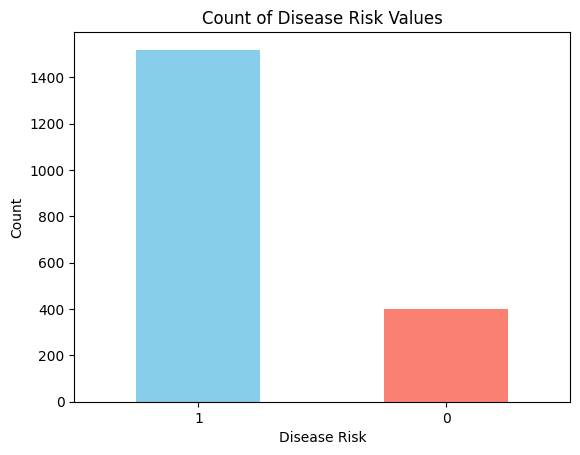

In [9]:
# Example usage:
plot_disease_risk_distribution('/content/drive/MyDrive/eye_dataset/Training_Set/normalities_prob.csv')

Disease_Risk value counts:
 Disease_Risk
1    506
0    134
Name: count, dtype: int64


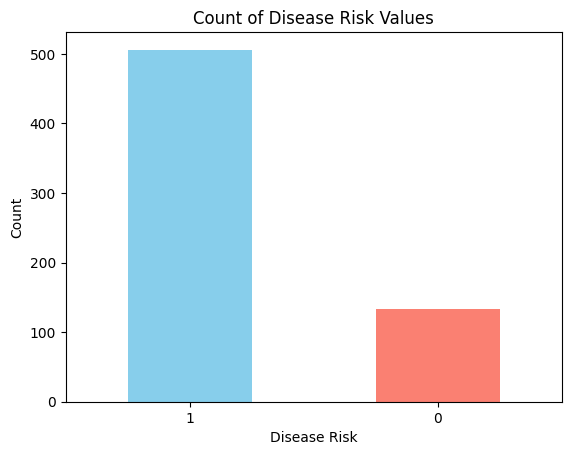

In [11]:
plot_disease_risk_distribution('/content/drive/MyDrive/eye_dataset/Evaluation_Set/normalities_prob_val.csv')

Disease_Risk value counts:
 Disease_Risk
1    506
0    134
Name: count, dtype: int64


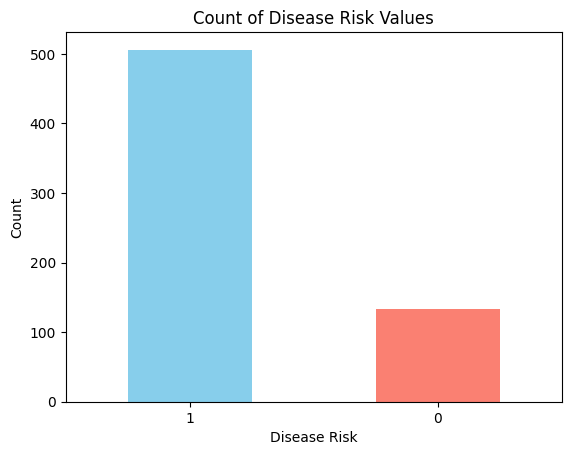

In [12]:
plot_disease_risk_distribution('/content/drive/MyDrive/eye_dataset/Test_Set/normalities_prob.csv')

Processing images in /content/drive/MyDrive/eye_dataset/Training_Set/Training...

Unique image resolutions and their counts:
(2048, 1536): 150 images
(2144, 1424): 1493 images
(4288, 2848): 277 images


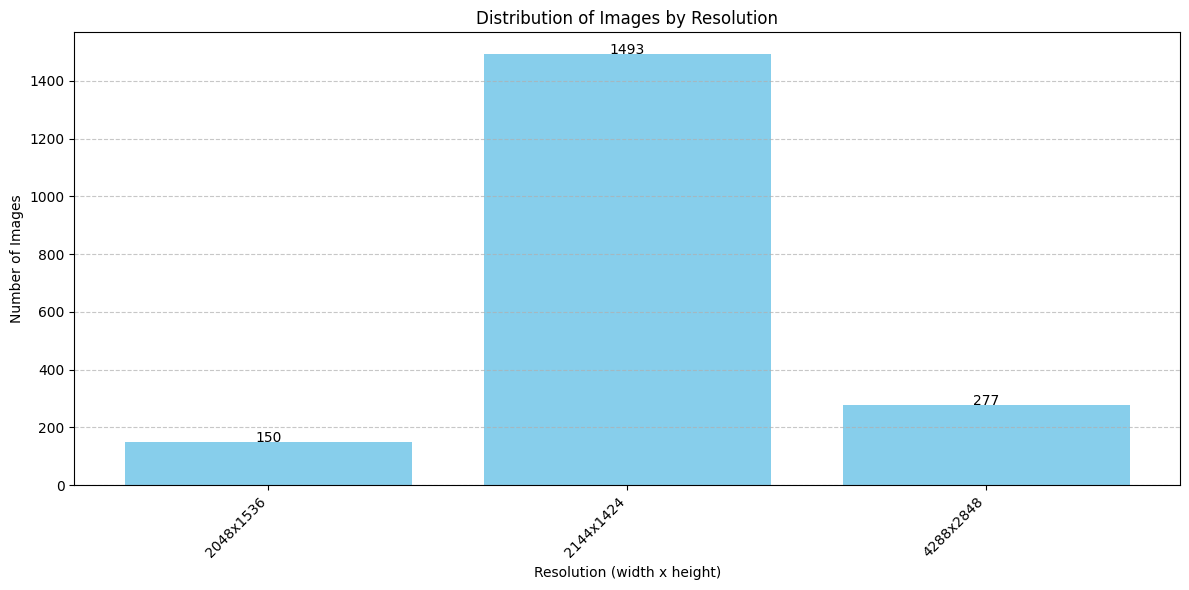


Total images processed: 1920
Most common resolution: (2144, 1424) with 1493 images


Counter({(2048, 1536): 150, (2144, 1424): 1493, (4288, 2848): 277})

In [27]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

def analyze_image_resolutions(folder_path):
    """
    Analyzes images in the specified folder, counts occurrences of each unique resolution,
    and displays the results both textually and visually.

    Args:
        folder_path (str): Path to the folder containing images

    Returns:
        dict: Dictionary with resolutions as keys and counts as values
    """
    # Dictionary to store resolution counts
    resolution_counts = Counter()

    # Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Error: Folder '{folder_path}' does not exist")
        return resolution_counts

    # Go through each image
    print(f"Processing images in {folder_path}...")
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

    if not image_files:
        print("No image files found in the specified folder")
        return resolution_counts

    for filename in image_files:
        img_path = os.path.join(folder_path, filename)
        try:
            with Image.open(img_path) as img:
                resolution_counts[img.size] += 1  # Count occurrences of each resolution
        except Exception as e:
            print(f"Error processing {filename}: {e}")

    # Print results
    print("\nUnique image resolutions and their counts:")
    for resolution, count in resolution_counts.items():
        print(f"{resolution}: {count} images")

    # Create visualization if there are results
    if resolution_counts:
        visualize_resolutions(resolution_counts)

        # Summary statistics
        total_images = sum(resolution_counts.values())
        most_common_resolution = resolution_counts.most_common(1)[0]
        print(f"\nTotal images processed: {total_images}")
        print(f"Most common resolution: {most_common_resolution[0]} with {most_common_resolution[1]} images")

    return resolution_counts


def visualize_resolutions(resolution_counts):
    """
    Creates a bar chart visualization of image resolution distribution.

    Args:
        resolution_counts (Counter): Counter object with resolutions and their counts
    """
    plt.figure(figsize=(12, 6))

    # Create labels for the x-axis
    labels = [f"{width}x{height}" for (width, height) in resolution_counts.keys()]
    counts = list(resolution_counts.values())

    # Create a bar chart
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Resolution (width x height)')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images by Resolution')
    plt.xticks(rotation=45, ha='right')

    # Add count labels on top of each bar
    for i, count in enumerate(counts):
        plt.text(i, count + 0.5, str(count), ha='center')

    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Example path - replace with your actual path
analyze_image_resolutions('/content/drive/MyDrive/eye_dataset/Training_Set/Training')

Processing images in /content/drive/MyDrive/eye_dataset/Evaluation_Set/Validation...

Unique image resolutions and their counts:
(2144, 1424): 495 images
(4288, 2848): 92 images
(2048, 1536): 53 images


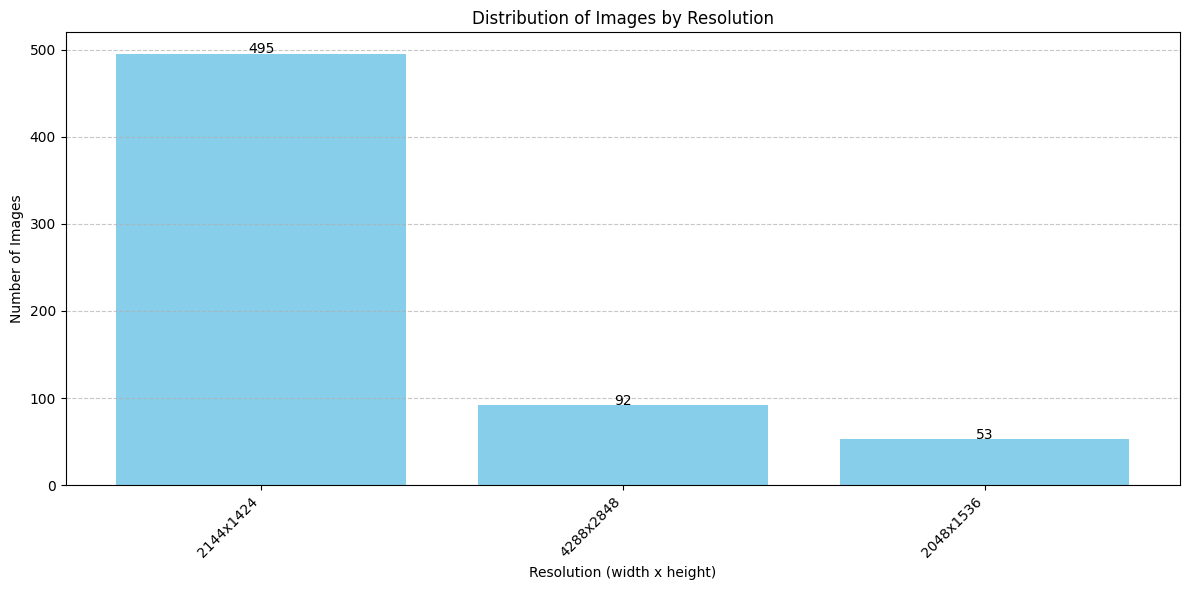


Total images processed: 640
Most common resolution: (2144, 1424) with 495 images


Counter({(2144, 1424): 495, (4288, 2848): 92, (2048, 1536): 53})

In [28]:
analyze_image_resolutions('/content/drive/MyDrive/eye_dataset/Evaluation_Set/Validation')

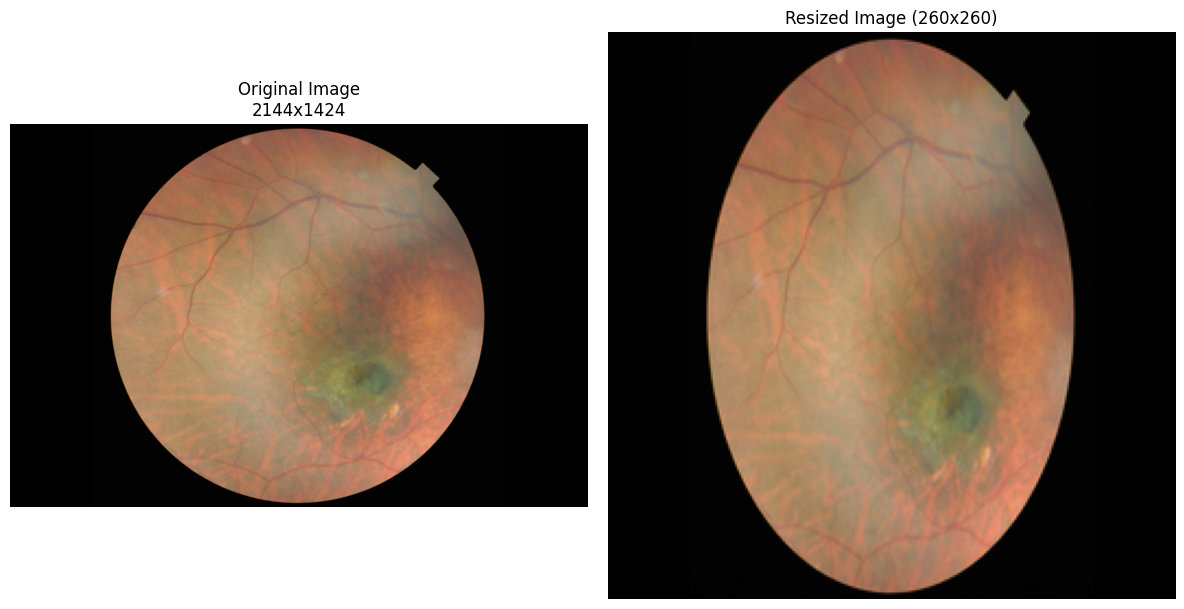

In [30]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def resize_and_display_image(img_path, target_size=(260, 260)):
    # Open the original image
    original_img = Image.open(img_path)

    # Get the dimensions of the original image
    original_size = original_img.size  # (width, height)

    # Resize the image to the target size using LANCZOS resampling (high quality)
    resized_img = original_img.resize(target_size, Image.Resampling.LANCZOS)

    # Plot both original and resized images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display original image
    axes[0].imshow(original_img)
    axes[0].set_title(f'Original Image\n{original_size[0]}x{original_size[1]}')
    axes[0].axis('off')

    # Display resized image
    axes[1].imshow(resized_img)
    axes[1].set_title(f'Resized Image ({target_size[0]}x{target_size[1]})')
    axes[1].axis('off')

    # Show the images
    plt.tight_layout()
    plt.show()

# Example usage: Resize and display an image
img_path = '/content/drive/MyDrive/eye_dataset/Training_Set/Training/7.png'
resize_and_display_image(img_path)


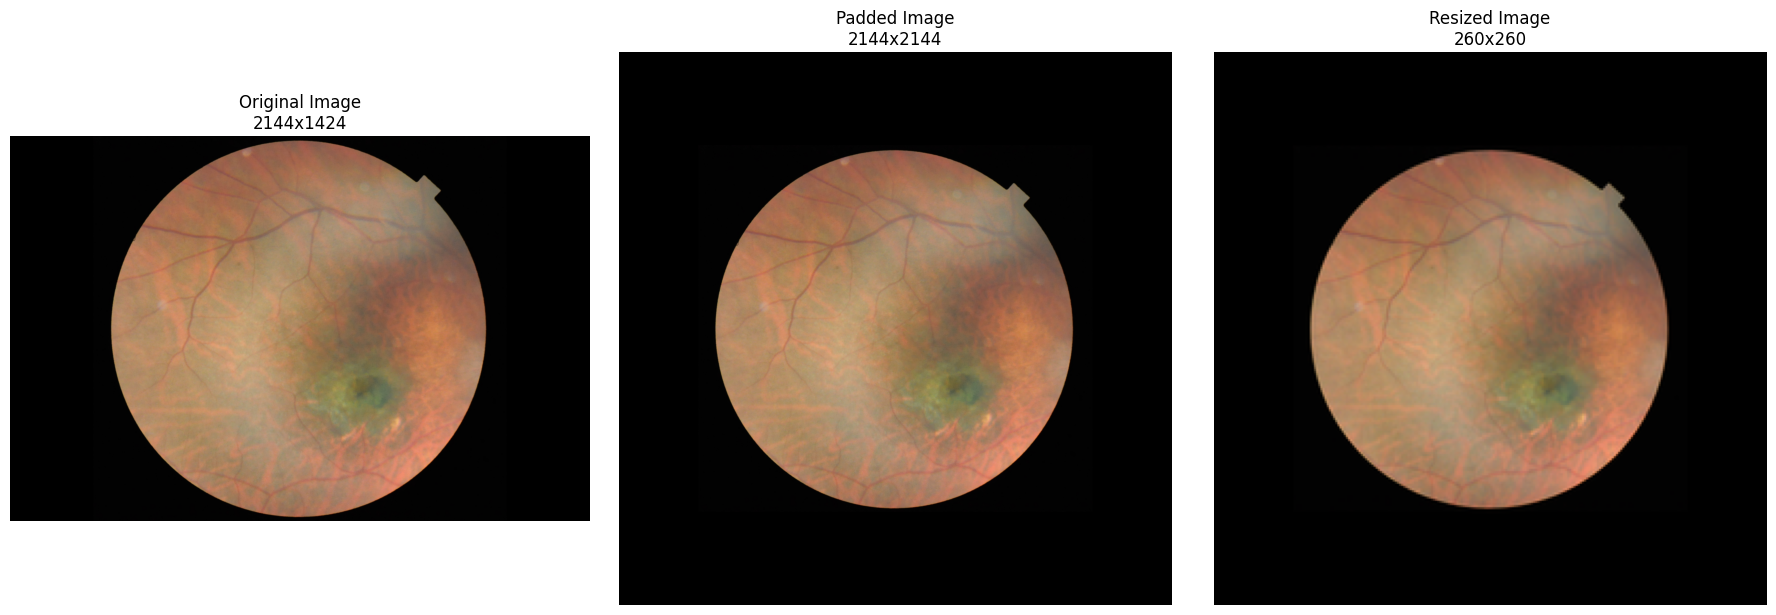

In [36]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def pad_and_resize_image(img_path, target_size=(260, 260), pad_color=(0, 0, 0)):
    """
    Pad rectangular images to square with black bars and resize to target size.

    Args:
        img_path: Path to the input image
        target_size: Desired output size (width, height)
        pad_color: Color for padding (0,0,0) for black

    Returns:
        Resized square image
    """
    # Open the original image
    original_img = Image.open(img_path)

    # Ensure the image is in RGB mode
    original_img = original_img.convert("RGB")

    # Get the original dimensions
    original_width, original_height = original_img.size

    # Step 1: Determine the larger dimension
    max_dimension = max(original_width, original_height)

    # Step 2: Calculate the difference between dimensions
    width_diff = max_dimension - original_width
    height_diff = max_dimension - original_height

    # Step 3: Distribute padding equally on both sides
    left_padding = width_diff // 2
    right_padding = width_diff - left_padding  # Handles odd differences
    top_padding = height_diff // 2
    bottom_padding = height_diff - top_padding  # Handles odd differences

    # Step 4: Create a new square canvas with black background
    padded_img = Image.new("RGB", (max_dimension, max_dimension), pad_color)

    # Paste the original image with proper padding
    paste_position = (left_padding, top_padding)
    padded_img.paste(original_img, paste_position)

    # Resize the padded image to the target size
    resized_img = padded_img.resize(target_size, Image.Resampling.LANCZOS)

    # Plot original, padded, and resized images
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Display original image
    axes[0].imshow(original_img)
    axes[0].set_title(f'Original Image\n{original_width}x{original_height}')
    axes[0].axis('off')

    # Display padded image
    axes[1].imshow(padded_img)
    axes[1].set_title(f'Padded Image\n{padded_img.size[0]}x{padded_img.size[1]}')
    axes[1].axis('off')

    # Display resized image
    axes[2].imshow(resized_img)
    axes[2].set_title(f'Resized Image\n{target_size[0]}x{target_size[1]}')
    axes[2].axis('off')

    # Show the images
    plt.tight_layout()
    plt.show()

    return resized_img

# Example usage: Pad and resize an image
img_path = '/content/drive/MyDrive/eye_dataset/Training_Set/Training/7.png'
pad_and_resize_image(img_path);

In [37]:
10 // 3

3